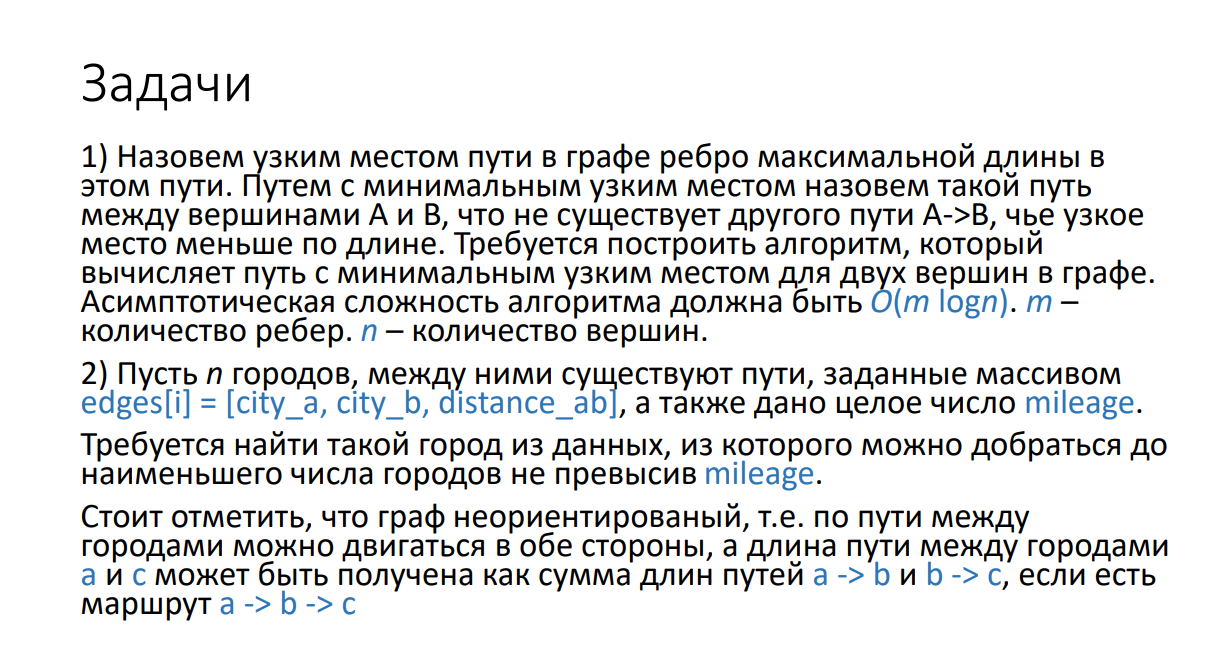

In [1]:
print(sum(list(map(int, input().split()))))

1 2 3 4
10


In [1]:
class graph():
    def __init__(self, vertexes = []):
        self.__graph__ = {}
        self.add_vertex(vertexes)
        
    def get_graph(self):
        return self.__graph__
    
    def init_gr(self, gr):
        self.__graph__ = gr
    
    def get_vertexes(self):
        a = {j for i in self.__graph__ for j in self.__graph__[i].keys()}
        a.update(list(self.__graph__.keys()))
        return list(a)
    
    def add_vertex(self, vertexes = [], mode = 1):
        '''
            на вход подаётся массив вида [[a, b, coast_a_to_b], ...]
            и mode -> 1(связаны в обе стороны)
                   -> 0(связаны в одну)
        '''
        for a, b, coast_a_to_b in vertexes:        
            self.__graph__[a] = self.__graph__.get(a, {})
            self.__graph__[a][b] = coast_a_to_b
            if mode:
                self.__graph__[b] = self.__graph__.get(b, {})
                self.__graph__[b][a] = coast_a_to_b
    
    def way_with_min_max_edge(self, start, stop):
        '''
            возвращает путь с минимальным максимальным ребром в виде [цена ребра, путь]
        '''
        best_way = {start:[0, start, start+start]} # эл = имя_вершины:(макс ребро в пути, путь до нее, сама макс вершина)
        bypassed_vertexes = [] # обойденные вершины
        potential_vertices = [start] # потенциальные вершины
        
        while(potential_vertices):
            node = min(best_way, key=lambda x: best_way[x][0] if x in potential_vertices else float('inf'))
            for point, length in self.__graph__[node].items():
                if max(best_way[node][0], length) < best_way.get(point, [float('inf'), 0])[0]:
#                     best_way[point] = [max(best_way[node][0], length), best_way[node][1]+point]

                    if max(best_way[node][0], length) == length:
                        best_way[point] = [length, best_way[node][1]+point, node+point]
                    else:
                        best_way[point] = [max(best_way[node][0], length), best_way[node][1]+point, best_way[node][2]]
                    potential_vertices.append(point)
            potential_vertices.remove(node)
            bypassed_vertexes.append(node)
        
        return best_way.get(stop, None)
    def quantity_point_way_with_mileage(self, start, mileage):
        '''
            Возвращает количество вершин до которых можно дойти из start за mileage "ходов"
        '''
        best_way = {start:mileage} # эл = имя_вершины:сколько у нее осталось "ходов"
        bypassed_vertexes = [] # обойденные вершины
        potential_vertices = set(start) # потенциальные вершины
        while(potential_vertices):
            node = max(best_way, key=lambda x: best_way[x] if x in potential_vertices else -1)
            
            for point, length in self.__graph__[node].items():
                if best_way[node] - length > best_way.get(point, -1):
                    best_way[point] = best_way[node] - length
                    potential_vertices.add(point)
            potential_vertices.remove(node)
            bypassed_vertexes.append(node)
#         print(start, mileage, '\n', best_way)
        return len(best_way)-1

    def deicstra_min_way (self, start, stop):
        '''
            возвращает путь с минимальной длинной [цена, путь]
        '''
        best_way = {start:[0, start]} # эл = имя_вершины:(длина пути, путь до нее)
        bypassed_vertexes = [] # обойденные вершины
        potential_vertices = [start] # потенциальные вершины
        
        i = 0
        while(potential_vertices and i != 100):
            node = min(best_way, key=lambda x: best_way[x][0] if x in potential_vertices else float('inf'))
            for point, length in self.__graph__.get(node, {}).items():
                if best_way[node][0] + length < best_way.get(point, [float('inf'), 0])[0]:
                    best_way[point] = [best_way[node][0] + length, best_way[node][1] + point]
                    potential_vertices.append(point)
            potential_vertices.remove(node)
            bypassed_vertexes.append(node)
            i += 1
        
        return best_way.get(stop, None)
    def min_BF(self, start, stop):
        '''
            возвращает путь с минимальной длинной [цена, путь]
            если есть отрицательный цикл, то None
        '''
        N_ver = len(self.get_vertexes())
        
        best_way = {point:[float('inf'), None] for point in self.get_vertexes()}# {вершина: [цена пути, путь]}
        best_way[start] = [0, start]
        
        for i in range(N_ver-1):
            for point_A in self.get_vertexes():
                for point_B, dist in self.__graph__.get(point_A, {}).items():
                    if best_way[point_B][0] > best_way[point_A][0] + dist:
                        best_way[point_B] = [best_way[point_A][0] + dist, best_way[point_A][1]+point_B]
                    
                    
        for point_A in self.get_vertexes():
            for point_B, dist in self.__graph__.get(point_A, {}).items():
                if best_way[point_B][0] > best_way[point_A][0] + dist:
                    return None
                
        return best_way[stop]

# 1

In [2]:
print('введите массив, описываюший граф, вида:\n\tA B 10\n\tB C 15\n\t ...\n\t end')

введите массив, описываюший граф, вида:
	A B 10
	B C 15
	 ...
	 end


In [3]:
g = graph()
ver = []
while(True):
    buf = input()
    if buf == 'end':
        break
    buf = buf.split()
    g.add_vertex([[buf[0], buf[1], float(buf[2])]])
start = input('введите вершину начала: ')
stop = input('введите вершину конца: ')

1 0 5
0 2 8
1 5 9
1 3 12
3 5 6
3 4 3
5 2 4
2 6 2
4 2 8
4 6 7
end
введите вершину начала: 1
введите вершину конца: 6


In [4]:
answer = g.way_with_min_max_edge(start, stop)
if answer:
    print(f'искомый путь:\n{"->".join(answer[1])}\nсамое длинное ребро в пути: {answer[2][0]} --{answer[0]}--> {answer[2][1]}')

искомый путь:
1->0->2->6
самое длинное ребро в пути: 0 --8.0--> 2


# 2

In [212]:
print('введите массив, описываюший граф, вида:\n\tA B 10\n\tB C 15\n\t ...\n\t end')

введите массив, описываюший граф, вида:
	A B 10
	B C 15
	 ...
	 end


In [267]:
g = graph()
ver = []
while(True):
    buf = input()
    if buf == 'end':
        break
    buf = buf.split()
    g.add_vertex([[buf[0], buf[1], float(buf[2])]])
mileage = float(input('введите mileage: '))

a b 4
a d 2
d b 1
b c 1
end
введите mileage: 2


In [18]:
g = graph()
g.init_gr({'1': {'0': 5.0, '5': 9.0, '3': 12.0},
 '0': {'1': 5.0, '2': 8.0},
 '2': {'0': 8.0, '5': 4.0, '6': 2.0, '4': 8.0},
 '5': {'1': 9.0, '3': 6.0, '2': 4.0},
 '3': {'1': 12.0, '5': 6.0, '4': 3.0},
 '4': {'3': 3.0, '2': 8.0, '6': 7.0},
 '6': {'2': 2.0, '4': 7.0}})

In [22]:
milleage = 8
answer = g.get_vertexes()[0]
s = g.quantity_point_way_with_mileage(answer, mileage)
for i in g.get_vertexes()[1:]:
    if g.quantity_point_way_with_mileage(i, mileage) < s:
        s = g.quantity_point_way_with_mileage(i, mileage)
        answer = i
print(f'наименьшее число городов({s}) можно посетить из {answer}')

наименьшее число городов(6) можно посетить из 2


# 3 Алгоритм Беллмана-Форда

In [17]:
# пример из https://www.programiz.com/dsa/bellman-ford-algorithm
g = graph()
g.add_vertex([['a', 'b', 4], ['a', 'e', 2], ['b', 'e', 3], ['e', 'b', 1], ['b', 'd', 3], ['e', 'c', 4], ['b', 'c', 2], ['d', 'c', -5], ['e', 'd', 5]], 0)
for i in g.get_vertexes():
    print(i, g.min_BF('a', i), g.deicstra_min_way('a', i))

a [0, 'a'] [0, 'a']
d [6, 'aebd'] [6, 'aebd']
b [3, 'aeb'] [3, 'aeb']
c [1, 'aebdc'] [1, 'aebdc']
e [2, 'ae'] [2, 'ae']


In [16]:

for i in g.get_vertexes():
    print(i, g.min_BF('0', i), g.deicstra_min_way('0', i))

2 [8.0, '02'] [8.0, '02']
1 [5.0, '01'] [5.0, '01']
6 [10.0, '026'] [10.0, '026']
5 [12.0, '025'] [12.0, '025']
4 [16.0, '024'] [16.0, '024']
3 [17.0, '013'] [17.0, '013']
0 [0, '0'] [0, '0']


# Замер эффективности

In [39]:
from random import randint
import time
import matplotlib.pyplot as plt
import math
# start_time = time.time()

In [20]:
from tqdm import tqdm_notebook as tqdm
tqdm(массив)

In [184]:
time_work = []
n_work = []
for n in log_progress(range(2, 700), every=10):
    vertexs = [str(i) for i in range(n)]
    nodes = []
    for i in range(len(vertexs)-1):
        for j in range(i + 1, len(vertexs)):
            nodes.append([vertexs[i], vertexs[j], randint(0, 20)])
    g = graph(nodes)
    start_time = time.time()
    g.way_with_min_max_edge(vertexs[0], vertexs[-1])
    time_work.append(time.time() - start_time)
    n_work.append(n)

IntProgress(value=0, max=698)

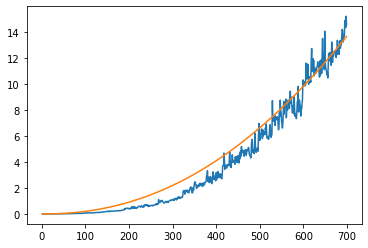

In [199]:
C = 10**-5.37
f = lambda n: C*n**2*math.log(n)
plt.plot(n_work, time_work)
x = list(range(1, 700))
plt.plot(x, [f(n) for n in x])

$ \frac{time(n+1, m+n+1)}{time(n, m)} = \frac{(n+1)log(n+1)}{log(n)}, m = n!$

In [157]:
otkl = []
for n in range(20, 200):
    otkl.append(time_work[n+1]/time_work[n] - ((n+1)**2*math.log(n+1))/(n**2*math.log(n)))

In [158]:
sum(otkl_dele)/len(otkl_dele)

-84.69390582196516

In [170]:
start_time = time.time()
a = {x:1 for x in range(10000)}
for i in range(10000000):
    b = a[5]
time.time() - start_time

0.796370267868042

In [171]:
start_time = time.time()
for i in range(10000000):
    g = 1
time.time() - start_time

0.5245950222015381